<a href="https://colab.research.google.com/github/GeisonVillasBoas/sigmoidal_data_science/blob/main/AirBnb_ipynb_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Montreal

O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas, em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.

Mesmo sem possuir um único hotel, hoje o AirBnb é Considerado atualmente como a **maior rede hoteleira mundial**, seu funcionamento acontece através de uma comunidade baseada no compartilhamento.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Montreal, e ver quais insights podem ser extraídos a partir de dados brutos.**

# A cidade de Montreal

Localizada na província de Quebec, e conhecida como a maior cidade bilingue do mundo, Montreal é também a segunda maior cidade do Canadá. Localizando-se em uma ilha no rio São Lourenço e foi batizada em homenagem ao Monte Royal, uma montanha com três colinas localizada no centro da cidade. Com diversos pontos turísticos, incluindo a Basílica de Notre-Dame, Montreal é o destino turistico de mais de 10 milhoes de pessoas por ano.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/canada/qc/montreal/2021-07-08/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Com isso em mente, vamos ao projeto.

In [1]:
# importar os dados necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2021-07-08/visualisations/listings.csv')

## Análise dos Dados

A finalidade desta etapa é criar um entendimento inicial de como os dados estão organizados. para isso iremos iniciar com o dicionário de variáveis.

**Dicionário de variáveis**


* **id** - número de identificação do imóvel
* **name** - nome do imóvel no anúncio
* **host_id** - número de identificação do proprietário do imóvel
* **host_name** - nome do proprietário do imóvel
* **neighbourhood_group** - grupo de vizinhança (esta coluna não possui valor válido)
* **neighbourhood** - nome do bairro
* **latitude** - coordenada de latitude da propriedade
* **longitude** - coordenada de longitude da propriedade 
* **room_type** - tipo de imóvel/quarto oferecido
* **price** - preço de aluguel do imóvel
* **minimum_nights** - quantidade mínima de noites para alugar
* **number_of_reviews** - número de avaliações da propriedade
* **last_review** - data da última avaliação
* **reviews_per_month** - média de avaliações por mês
* **calculated_host_listings_count** - Quantidade de imóveis anunciados pelo proprietário
* **availability_365** -Quantidade de dias disponíveis por ano

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas, e também as 5 últimas a fim de garantir que a importação dos dados foi completa.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.52859,-73.58480,Private room,38,2,245,2018-07-29,2.25,1,3
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,42,2,145,2021-07-08,1.39,5,230
2,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,123,2,330,2020-03-15,2.88,2,264
3,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,242,3,71,2020-08-30,0.63,2,328
4,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,154,2019-10-02,1.38,5,311


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O *dataset* utilizado neste estudo é uma versão "resumida", sendo que na mesma página onde baixamos este arquivo encontramos uma versão completa com uma quantidade de 13368 entradas e com 74 váriaveis. 

No nosso caso como podemos ver abaixo possuimos um total de 13368 entradas e 16 variáveis. 

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 13368
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Sabemos que a quantidade de valores ausentes impacta diretamente na qualidade de um *dataset*. Então compreender se esses valores ausentes são significativos quando comparados ao total de entradas é de grande importancia. 
Após a análise podemos constatar que:

* A coluna `neighbourhood_group` possui 100% dos seus valores ausentes. 
* As colunas `reviews_per_month` e `last_review` possuem aproximadamente 25% de valores nulos.
* Enquanto as colunas `name` e `host_name` têm respectivamente 5% e 4% de seus valores ausentes.

In [5]:
 # ordenar em ordem decrescente as váriaveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  24.902753
last_review                        24.902753
name                                0.052364
host_name                           0.044883
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Após plotar o histograma, podemos identificar o tipo de distribuição das variáveis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cb60fb750>,
      dtype=object)

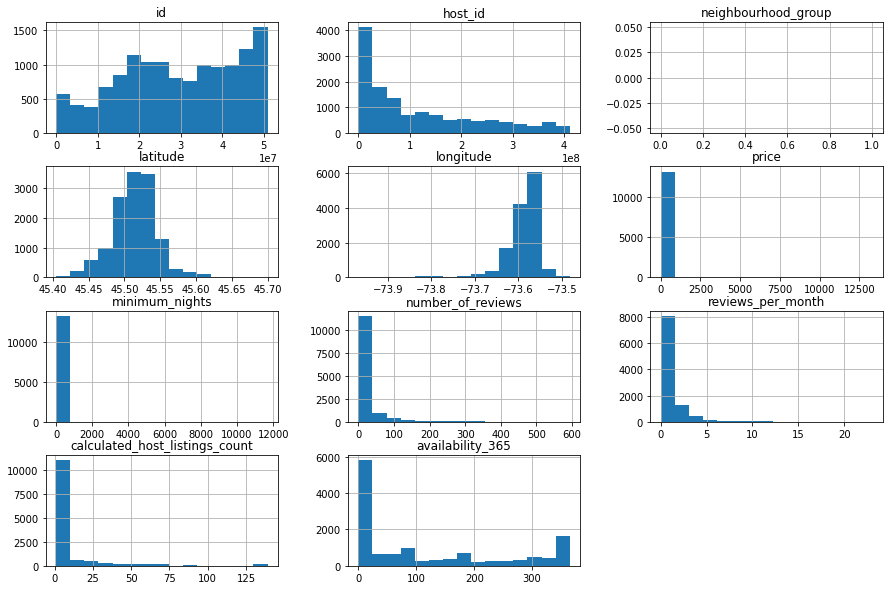

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Há *outliers* presentes?**

A partir da análise do histograma, podemos verificar que as variáveis `price`, `minimum_nights` e `calculated_host_listings_count` apresentam indicíos que podem significar a presença de *outliers*.

Devido os valores não seguirem uma distribuição acabam por distorcer toda a representação gráfica, contudo, para confirmar a existência de *outliers* podemos utilizar estes dois métodos:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [17]:
# ver o resumo estatitíco das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13368.000000,13368.000000,13368.000000,10039.000000,13368.000000,13368.000000
mean,125.248953,14.673624,19.723743,0.936048,8.970826,116.049895
std,282.377027,109.506071,43.707861,1.445453,19.991647,134.162980
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.110000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.370000,1.000000,58.000000
75%,127.000000,10.000000,17.000000,1.150000,5.000000,221.000000
max,13294.000000,11684.000000,594.000000,23.000000,139.000000,365.000000


Observando o resumo estatístico acima, algumas hipóteses podem ser confirmadas como:

* A variável `price` possui 75% do valor abaixo de 127, porém seu valor máximo é 13294.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


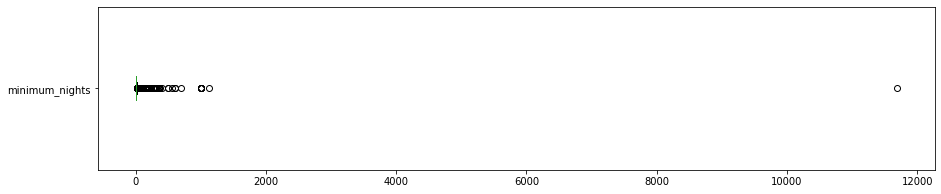

minimum_nights: valores acima de 30:
1610 entradas
12.0437%


In [7]:
# minimum_nights
df.minimum_nights.plot( kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price


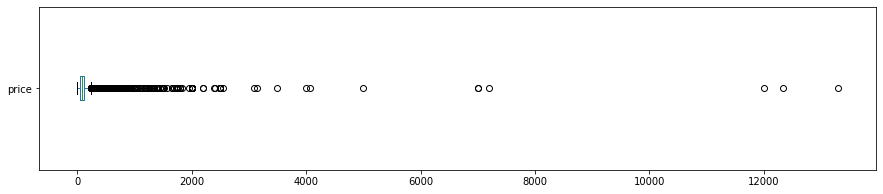


price: valores acima de 600
217 entradas
1.6233%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 600 para price
print('\nprice: valores acima de 600')
print('{} entradas'.format(len(df[df.price > 600])))
print('{:.4f}%'.format((len(df[df.price > 600]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Após identificarmos asvariáveis `price` e `minimum_nights`como outliers, devemos plotar novamente o histograma, mas limpando o seu DataFrame



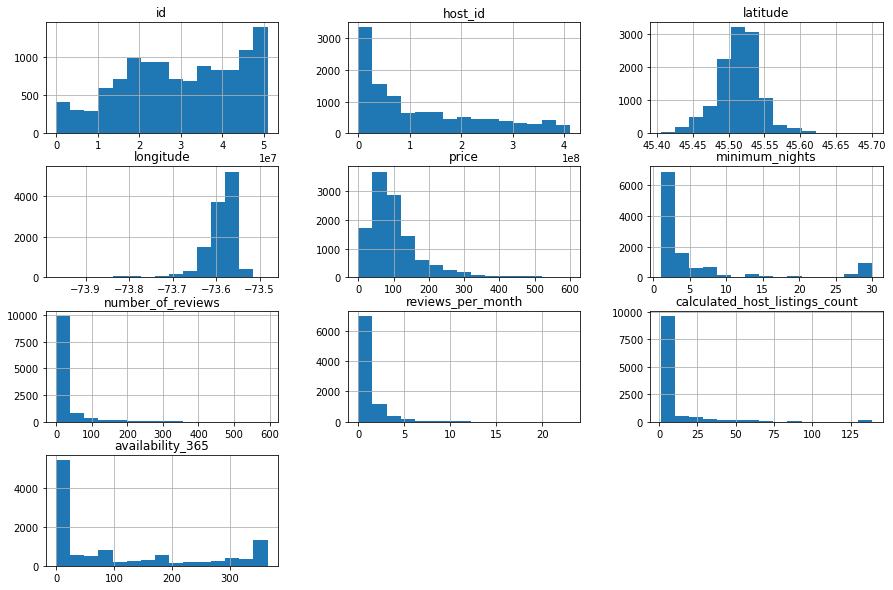

In [9]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover a coluna vazia `neighbourhood_group`
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa dizer que existe uma relação entre duas coisas. Em nosso estudo, buscamos por uma relação ou semelhança entre duas variáveis.

Como esta relação pode ser medida, é função do coeficiente de correlação determinar qual a intensidade esta relação possui. Então, para identificar as correlações existentes entre as variáveis de interesse, devemos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [10]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.040441,0.067456,0.094478,0.083819,0.163462
minimum_nights,-0.040441,1.000000,-0.063155,-0.095948,0.243980,0.070126
number_of_reviews,0.067456,-0.063155,1.000000,0.557682,-0.041025,0.086165
reviews_per_month,0.094478,-0.095948,0.557682,1.000000,0.124746,0.145063
calculated_host_listings_count,0.083819,0.243980,-0.041025,0.124746,1.000000,0.123936
availability_365,0.163462,0.070126,0.086165,0.145063,0.123936,1.000000


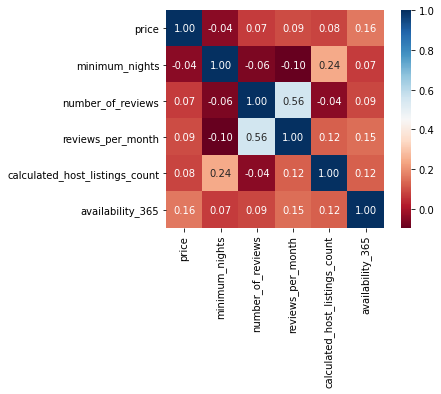

In [11]:
# gerar o hitmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor= 'white', annot=True);

Como resultado da matriz de correlação e do heatmap podemos ver que existe uma correlação entre o preço e o disponibilidade do imóvel durante o ano, e tam´bem podemos ver uma relação enre preço e quantidade de reviews.

### **Q6. Qual o tipo de imóvel mais disponibilizado no Airbnb?**

Existe uma grande variedade nos tipos de imoveis a serem locados na plataforma seja um imóvel completo(casa ou apartamento por exemplo), apenas um quarto, e até a opção de dividir o mesmo quarto com outras pessoas.Podemos saber qual o tipo de locação que está sendo anunciada na plataforma através da coluna `room_type`.

Agora para sabermos qual o tipo de imóvel mais locado na Airbnb podemos contar o quantas ocorrencias ocorrem em cada tipo de locação utilizando o método `value_counts()`.


In [12]:
# mostrar a quantidade de cada tipo imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    8203
Private room       3195
Shared room         102
Hotel room           56
Name: room_type, dtype: int64

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível

(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    70.984770
Private room       27.647975
Shared room         0.882658
Hotel room          0.484597
Name: room_type, dtype: float64

Conforme podemos ver nas tabelas acima, a maior quantidade de imóveis dispniveis na cidade de  Montreal fica por conta de casas ou apartamentos completos chegando a  um total de 70% dos imóveis disponíbilizados na cidade.

### **Q6. Qual a localidade mais cara de Montreal?**

Podemos utilizar o `groupby()` para verficar uma variável em função da outra. Neste caso como queremos saber qual a localidade mais cara de Montreal devemos comparar os *neighbourhoods* a partir do *price*.



In [14]:
# utilizando o groupby, verificamos a média de valores e colocamos em ordem decrescente
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dollard-des-Ormeaux    154.190476
Kirkland               151.600000
Senneville             131.000000
Côte-Saint-Luc         128.820513
Dorval                 125.840000
Mont-Royal             123.888889
Westmount              122.593220
Pierrefonds-Roxboro    122.368421
Outremont              122.244444
Ville-Marie            120.991247
Name: price, dtype: float64

Como resultado obtivemos como média de preço mais alta as localidades de *Dollard-des-Ormeaux*, e *Kirkland*, porém afim de verificar se essa amostra pode ser não representativa vamos verificar quantos imoveis disponiveis existem nessas localidades


In [15]:
# ver a quantidade de imóveis disponiveis em Dollard-des-Ormeaux
print(df_clean[df_clean.neighbourhood == 'Dollard-des-Ormeaux'].shape)

# ver as 5 primeiras entradas de Kirkland
df_clean[df_clean.neighbourhood == 'Kirkland']

(21, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1055,7490192,Huge WestIsland poolpatio 20min from dwtn mont...,5983064,Martin,Kirkland,45.45717,-73.86576,Entire home/apt,300,10,6,2020-09-07,0.51,1,309
1172,8760162,Condo is Virus free and empty 2 months now,45864818,Russel,Kirkland,45.44892,-73.85871,Entire home/apt,68,7,20,2019-04-29,0.34,1,319
7155,31990694,Rose Paradise,92516395,Hanz-Rene,Kirkland,45.45874,-73.85320,Private room,150,1,1,2019-02-02,0.03,1,363
11897,47763391,Private room with private Bathroom,135036129,Farzad,Kirkland,45.46638,-73.85777,Private room,45,1,0,NaN,NaN,1,89
12639,49608204,"Modern Townhouse , Montréal",59195359,Brian,Kirkland,45.45451,-73.84120,Entire home/apt,195,7,1,2021-07-04,1.00,1,118


Como nos são fornecidas também as coordenadas de  Latitudes e Longitudes para os imóveis, é possível plotar cada ponto e com isso verificar onde estão concentrados as maiores quantidades de imóveis. Para isso, considera-se `x=longitude` e `y=latitude`.

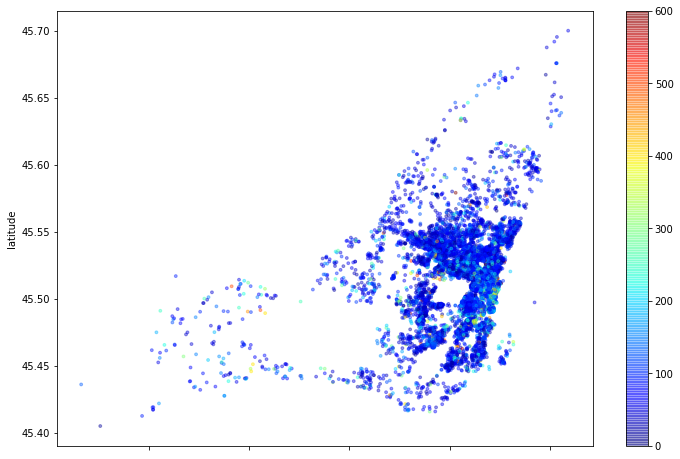

In [16]:
# plotar os imóveis pelas coordenadas de latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Apesar de termos utilizado uma base de dados superficiais do AirBnb podemos perceber  que em algumas localidades existiam poucos imovéis disponíveis para locação, o que elevava seu preço médio. Também foi possivel perceber a existencia de *outliers* em algumas das variáveis.

Dito isto lembramos que este dataset é uma versão resumida, utilizada para fins acadêmicos, para uma análise mais profunda recomenda-se o uso do dataset completo com todos os atributos disponiveis. 
